## Observations and Insights 



Capomulin proved to have the highest survivability rate (84%) amongst the drug regimens tested, having only lost 4 mice during the duration of the study; 21 out of 25 mice treated with Capomulin survived tthe duration of the study.

Ramicane seemed to perform slightly better than Capomulin in reducing tumor volume, maintaining a lower average final tumor volume. However, this performance mesure may depend on other factors such as starting tumor volume.

The weight of the mouse (in grams) proved to be a reliable predictor of tumor volume and is hightly correlated, displaying a R-Squared value of 0.90 when fitting a line to the data for Capomulin.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combine_df.head(10)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
5           33.464577                 1  
6           31.099498                 1  
7           26.546993                 1  
8           24.365505                 1  
9           22.050126                 1

In [56]:
# Checking the number of mice in the DataFrame.
num_mice = len(combine_df["Mouse ID"].unique())
print(f"Number of Mice: {num_mice}")

Number of Mice: 249


In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = combine_df[combine_df.duplicated(["Mouse ID","Timepoint"])]
dup_mice_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = combine_df[combine_df["Mouse ID"] == "g989"]
mouse_g989

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df[combine_df["Mouse ID"] != "g989"]
clean_df.head(10)

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   
5     k403     Ramicane  Male          21          16         25   
6     k403     Ramicane  Male          21          16         30   
7     k403     Ramicane  Male          21          16         35   
8     k403     Ramicane  Male          21          16         40   
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
5           33.464577                 1  
6           31.099498                 1  
7           26.546993                 1  
8           24.365505                 1  
9           22.050126                 1

In [60]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())
print(f"Number of Mice in clean DataFrame: {num_mice}")

Number of Mice in clean DataFrame: 248


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group data by Drug Regimen for summary stats
regimen_df = clean_df.groupby(["Drug Regimen"])

# Create summary stats series
mean_volume = regimen_df["Tumor Volume (mm3)"].mean()
median_volume = regimen_df["Tumor Volume (mm3)"].median()
variance_volume = regimen_df["Tumor Volume (mm3)"].var()
stdDev_volume = regimen_df["Tumor Volume (mm3)"].std()
sem_volume = regimen_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Generate summary stats DataFrame
summary_df = pd.DataFrame({"Mean": mean_volume,
                              "Median": median_volume,
                              "Variance": variance_volume,
                              "Standard Deviation": stdDev_volume,
                              "SEM": sem_volume
                          })

# Display summary stats DataFrame
summary_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar Plots

Text(0.5, 0, 'Days')

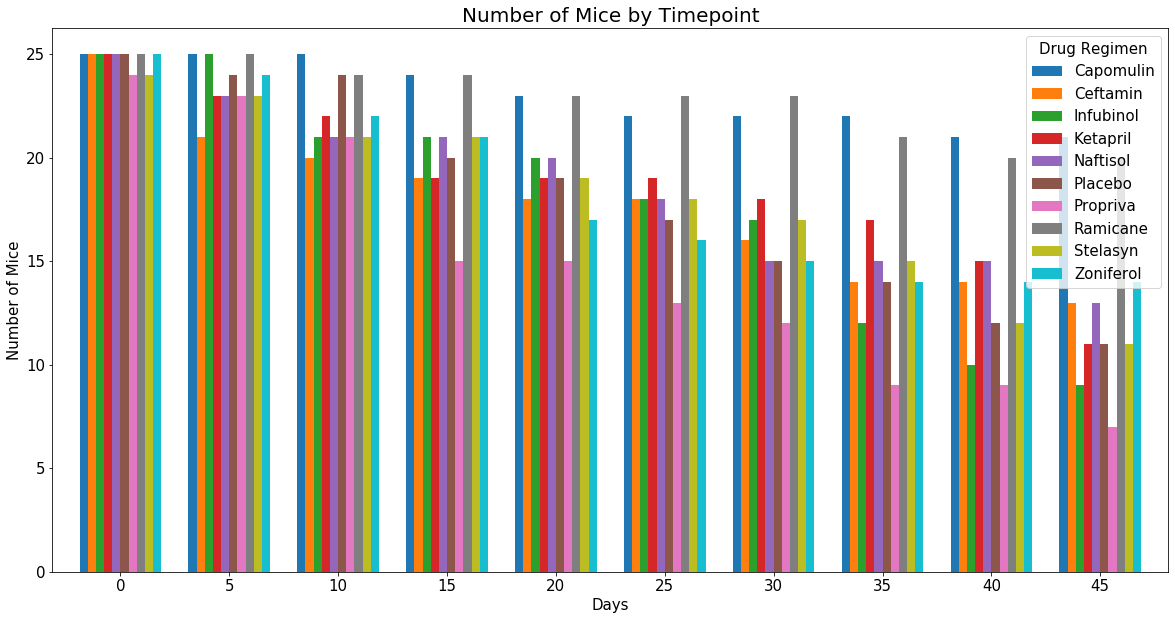

In [63]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# Group data by Drug Regimen, for counts of mice over time

# Version 1 - Plot using pandas (How I interpereted the Homework instrustions)
mice_perTimepoint = pd.DataFrame(clean_df.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"])                                          

# Reorganize DataFrame
mice_perTimepoint = mice_perTimepoint.unstack(level = 0)
mice_perTimepoint.columns = mice_perTimepoint.columns.get_level_values(1)

# Plot using pandas
pandas_plot = mice_perTimepoint.plot.bar(title="Number of Mice by Timepoint", figsize=(20,10), width=.75, fontsize=15, rot=0)
pandas_plot.title.set_size(20)
pandas_plot.set_ylabel("Number of Mice", fontsize=15)
pandas_plot.set_xlabel("Days", fontsize=15)

Text(0, 0.5, 'Number of Mice')

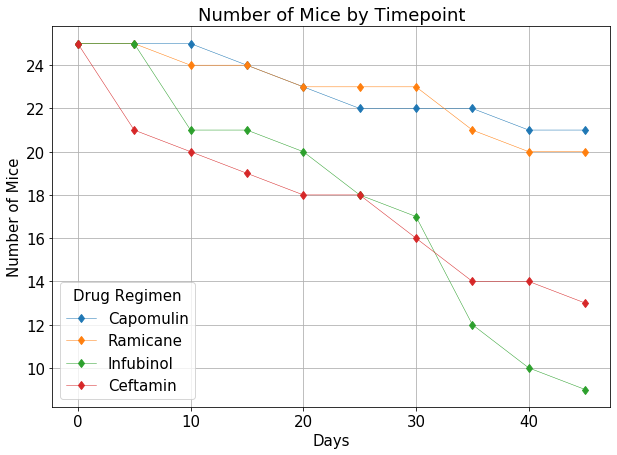

In [102]:
# Alternative Line Plot for Number of Mice per Timepoint using only top four treatments
# Create DataFrames for top four treatments
top_four_treatments_df = mice_perTimepoint[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]

# Generate line plot
top_four_treatments_df.plot(kind='line', use_index=True, grid=True, marker='d', linewidth=0.5, figsize=(10,7))
plt.title("Number of Mice by Timepoint")
plt.xlabel("Days")
plt.ylabel("Number of Mice")

Text(0.5, 0, 'Drug Regimen')

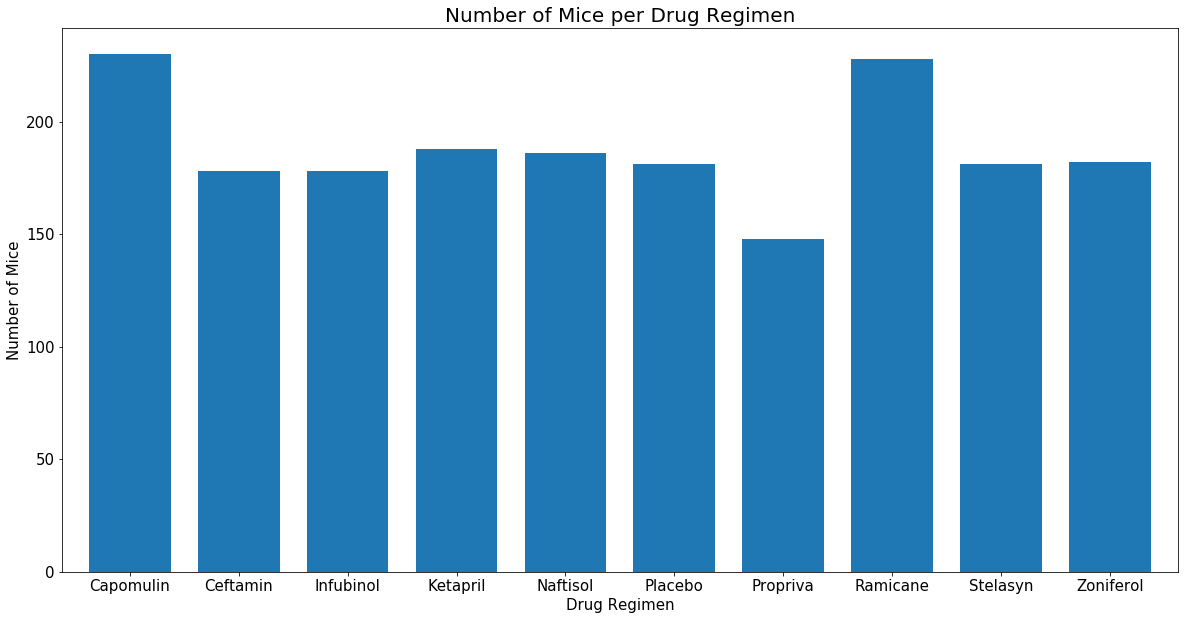

In [64]:
# Version 2 - Homework solution? (Mice for each Drug Regimen)
# Group data by Drug Regimen, with counts of mice 
bar_plot_df = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Plot using pandas
pandas_plot2 = bar_plot_df.plot.bar(title="Number of Mice per Drug Regimen", figsize=(20,10), width=.75, fontsize=15, rot=0)
pandas_plot2.title.set_size(20)
pandas_plot2.set_ylabel("Number of Mice", fontsize=15)
pandas_plot2.set_xlabel("Drug Regimen", fontsize=15)

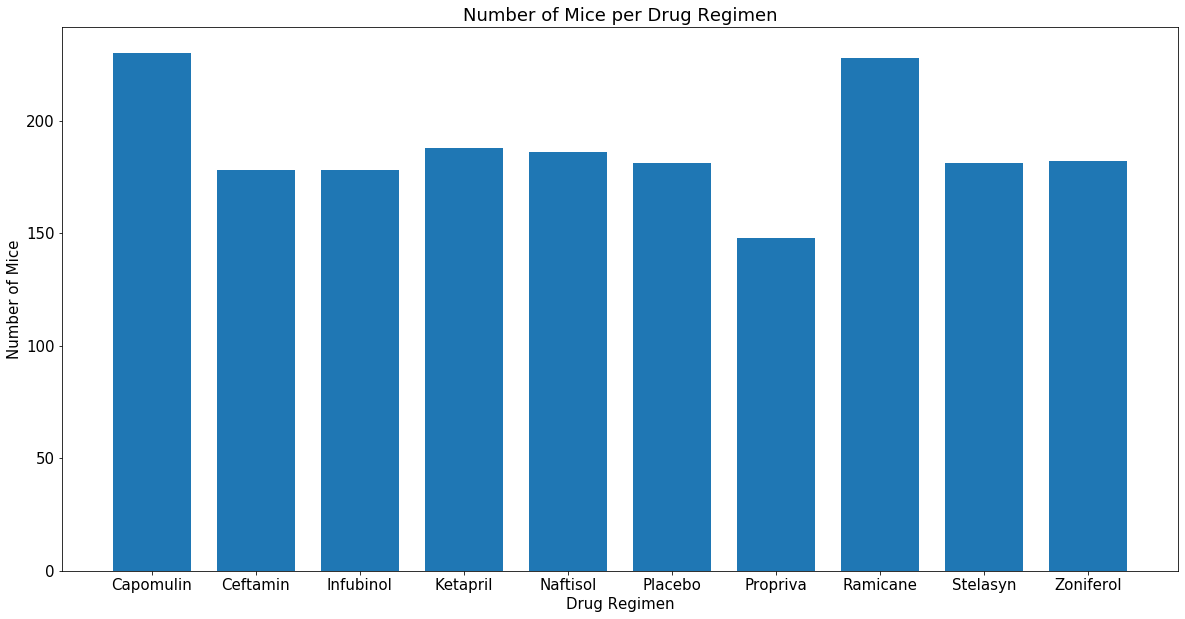

In [65]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# set yvalues to list
yvals = bar_plot_df.to_list()

#set xvalues to list
drug_list = mice_perTimepoint.columns.to_list()

# pyplot customization
figure(figsize=(20,10))
font = {"size" : 15}
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# plot using pyplot
pyplot = plt.bar(drug_list, yvals, width=.75)

## Pie Plots

Text(0, 0.5, '')

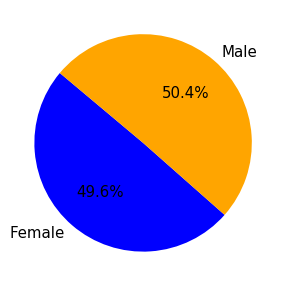

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create gender count DataFrame
gender_df = clean_df[["Sex","Mouse ID"]]
dropdups_gender_df = gender_df.drop_duplicates()
clean_gender_df = dropdups_gender_df.rename(columns={"Mouse ID": "Count"})

# Group target data using Grouper function
gender_groups = clean_gender_df.groupby([pd.Grouper(key="Sex")])["Count"].agg("count").reset_index()

# Colors for each section
colors = ["blue", "orange"]
# plot
pandas_pieplot = gender_groups.plot(kind="pie", y = "Count", figsize=(5,5), colors=colors, autopct='%1.1f%%', 
 startangle=140, labels=gender_groups["Sex"], legend = False, fontsize=15)
pandas_pieplot.set_ylabel("")

([<matplotlib.patches.Wedge at 0x1da9c2b6688>,
 [Text(-0.7176837777416648, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

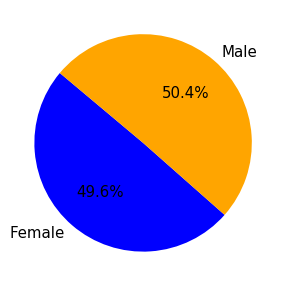

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert count column to List
gender_count = gender_groups["Count"].tolist()

# Labels for each section
labels = ["Female", "Males"]

# Colors for each section
colors = ["Blue", "Orange"]
          
# pyplot pie chart
plt.figure(figsize=(5,5))
plt.rcParams.update({"font.size": 15})
plt.pie(gender_count, labels=gender_groups["Sex"], colors=colors, autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimens 
top_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimens = top_regimens.sort_values(["Timepoint"], ascending=True)

top_regimens_data = top_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_regimens_data

Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)
0        Ramicane     k403          0           45.000000
1391    Infubinol     q132          0           45.000000
195     Capomulin     i738          0           45.000000
205      Ramicane     a520          0           45.000000
1370     Ceftamin     p438          0           45.000000
...           ...      ...        ...                 ...
350     Capomulin     v923         45           40.658124
144     Capomulin     m957         45           33.329098
337     Capomulin     j119         45           38.125164
59       Ramicane     s508         45           30.276232
1872    Infubinol     z581         45           62.754451

[814 rows x 4 columns]

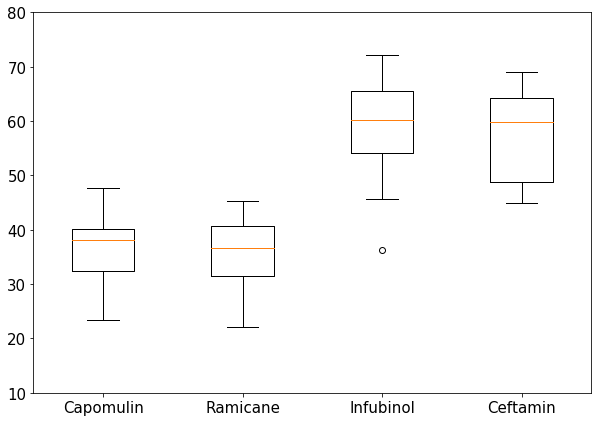

In [78]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Group data to get final tumor mesurement
top_regimens_ftv = top_regimens_data.groupby(["Drug Regimen", "Mouse ID"]).last()["Tumor Volume (mm3)"]

# Create DataFrame
top_regimen_df = top_regimens_ftv.to_frame()

#Create a list to use as labels and DataFrame
top_four_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Generate a box plot of the final tumor volume 
figure(figsize=(10,7))
top_four_regimens_df = top_regimen_df.reset_index()
tumor_vol = top_four_regimens_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_vol_df = pd.DataFrame(tumor_vol)
tumor_vol_df = tumor_vol_df.reindex(top_four_regimens)
tumor_vols = [vol for vol in tumor_vol_df["Tumor Volume (mm3)"]]
plt.boxplot(tumor_vols, labels=top_four_regimens)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

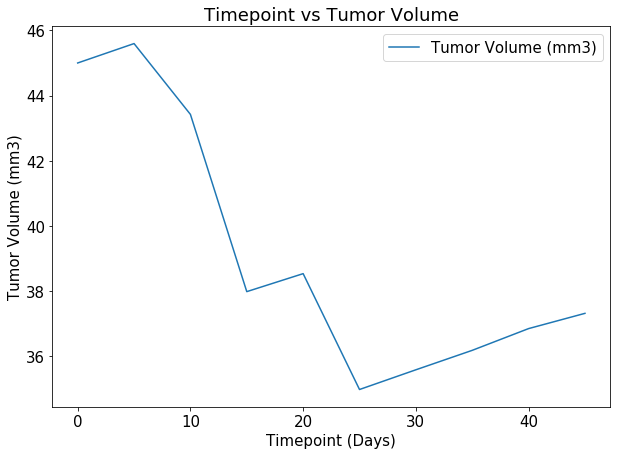

In [110]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_growth_i738 = clean_df[clean_df["Mouse ID"].isin(["i738"])]
tumor_growth_i738_data = tumor_growth_i738[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_growth_df = tumor_growth_i738_data.reset_index()
tumor_growth_plot_df = tumor_growth_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

plot = tumor_growth_plot_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)", figsize=(10,7))
plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

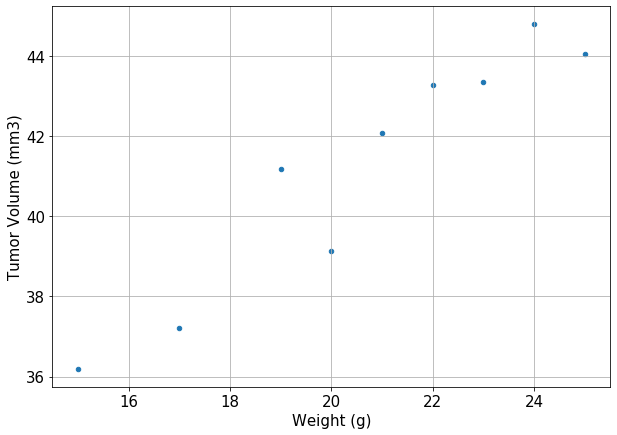

In [84]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight_capomulin = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
mouse_weight_capomulin_df = top_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight_scatter = mouse_weight_capomulin.reset_index()
mouse_weight_capomulin_sort = mouse_weight_scatter.sort_values(["Weight (g)"], ascending=True)
mouse_grouped_weight = mouse_weight_scatter.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
mouse_grouped_plot = pd.DataFrame(mouse_grouped_weight).reset_index()

mouse_weight_capomulin = mouse_grouped_plot.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
                                                grid = True, figsize=(10,7))

## Correlation and Regression

The r-squared is: 0.9034966277438606


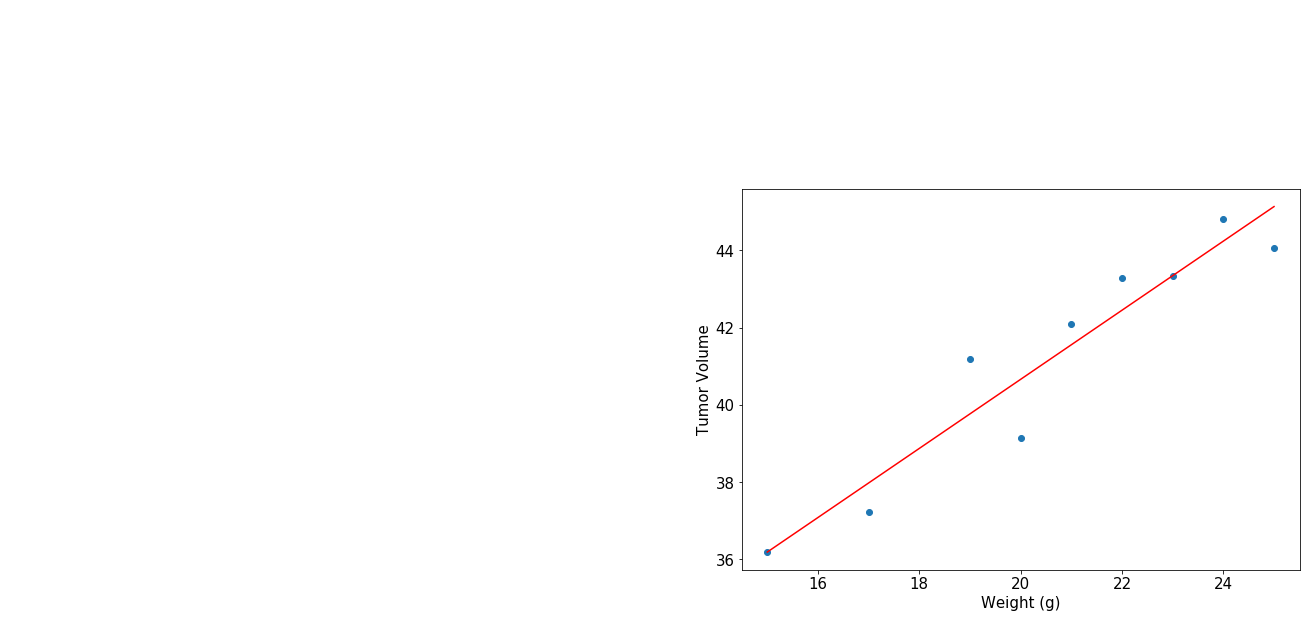

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.figure(figsize=(10,7))
x_values = mouse_grouped_plot["Weight (g)"]
y_values = mouse_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()